In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA,IncrementalPCA

import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,OneHotEncoder,StandardScaler
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from math import ceil
import os
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import silhouette_score, silhouette_samples

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView

In [2]:
df = pd.read_csv('donors.csv')

# Exploring the dataframe

In [3]:
df.head()

Unnamed: 0     ODATEDW OSOURCE  TCODE STATE    ZIP MAILCODE PVASTATE  \
0           0  2009-01-01     GRI      0    IL  61081                     
1           1  2014-01-01     BOA      1    CA  91326                     
2           2  2010-01-01     AMH      1    NC  27017                     
3           3  2007-01-01     BRY      0    CA  95953                     
4           4  2006-01-01              0    FL  33176                     

          DOB NOEXCH  ...    AVGGIFT CONTROLN HPHONE_D RFA_2R RFA_2F RFA_2A  \
0  1957-12-01      0  ...   7.741935    95515        0      L      4      E   
1  1972-02-01      0  ...  15.666667   148535        0      L      2      G   
2         NaN      0  ...   7.481481    15078        1      L      4      E   
3  1948-01-01      0  ...   6.812500   172556        1      L      4      E   
4  1940-01-01      0  ...   6.864865     7112        1      L      2      F   

  MDMAUD_R MDMAUD_F MDMAUD_A GEOCODE2  
0        X        X        X        C  
1        X        X        X        A  
2        X        X        X        C  
3        X        X        X        C  
4        X        X        X        A  

[5 rows x 476 columns]

In [4]:
df.shape

(95412, 476)

In [5]:
df.dtypes

Unnamed: 0     int64
ODATEDW       object
OSOURCE       object
TCODE          int64
STATE         object
               ...  
RFA_2A        object
MDMAUD_R      object
MDMAUD_F      object
MDMAUD_A      object
GEOCODE2      object
Length: 476, dtype: object

In [6]:
int64List = df.select_dtypes(include = "int64").columns

In [7]:
float64List = df.select_dtypes(include = "float64").columns

Check duplicates:

In [8]:
print(df[df.duplicated()].shape[0], 'duplicated records in the dataset.')

0 duplicated records in the dataset.


Check nulls:

In [9]:
#in columns
nullsCol = df.isna().sum().sort_values(ascending=False)
nullsCol.head(50)

RAMNT_5     95403
RDATE_5     95403
RAMNT_3     95170
RDATE_3     95170
RDATE_4     95131
RAMNT_4     95131
RDATE_6     94636
RAMNT_6     94636
RDATE_15    88150
RAMNT_15    88150
RAMNT_23    87553
RDATE_23    87553
RAMNT_20    87524
RDATE_20    87524
RAMNT_7     86517
RDATE_7     86517
RDATE_17    86011
RAMNT_17    86011
RAMNT_21    85899
RDATE_21    85899
RAMNT_10    84951
RDATE_10    84951
RAMNT_13    83162
RDATE_13    83162
NUMCHLD     83026
RAMNT_11    80672
RDATE_11    80672
RAMNT_19    79535
RDATE_19    79535
RDATE_9     78678
RAMNT_9     78678
RDATE_24    77674
RAMNT_24    77674
RAMNT_18    75634
RDATE_18    75634
RAMNT_22    74539
RDATE_22    74539
RAMNT_8     73940
RDATE_8     73940
RAMNT_14    72095
RDATE_14    72095
RDATE_12    69712
RAMNT_12    69712
RAMNT_16    68418
RDATE_16    68418
ADATE_15    65477
ADATE_23    56270
MBCOLECT    52914
MBGARDEN    52854
MBCRAFT     52854
dtype: int64

In [10]:
nullsCol = dict(nullsCol)
nullsCol.keys()

dict_keys(['RAMNT_5', 'RDATE_5', 'RAMNT_3', 'RDATE_3', 'RDATE_4', 'RAMNT_4', 'RDATE_6', 'RAMNT_6', 'RDATE_15', 'RAMNT_15', 'RAMNT_23', 'RDATE_23', 'RAMNT_20', 'RDATE_20', 'RAMNT_7', 'RDATE_7', 'RDATE_17', 'RAMNT_17', 'RAMNT_21', 'RDATE_21', 'RAMNT_10', 'RDATE_10', 'RAMNT_13', 'RDATE_13', 'NUMCHLD', 'RAMNT_11', 'RDATE_11', 'RAMNT_19', 'RDATE_19', 'RDATE_9', 'RAMNT_9', 'RDATE_24', 'RAMNT_24', 'RAMNT_18', 'RDATE_18', 'RAMNT_22', 'RDATE_22', 'RAMNT_8', 'RDATE_8', 'RAMNT_14', 'RDATE_14', 'RDATE_12', 'RAMNT_12', 'RAMNT_16', 'RDATE_16', 'ADATE_15', 'ADATE_23', 'MBCOLECT', 'MBGARDEN', 'MBCRAFT', 'PUBOPP', 'PUBPHOTO', 'PUBNEWFN', 'PUBDOITY', 'PUBHLTH', 'PUBCULIN', 'PUBGARDN', 'MAGMALE', 'MAGFEM', 'MAGFAML', 'MBBOOKS', 'ADATE_20', 'WEALTH1', 'WEALTH2', 'ADATE_13', 'ADATE_24', 'ADATE_21', 'ADATE_5', 'ADATE_10', 'ADATE_17', 'ADATE_22', 'ADATE_19', 'DOB', 'INCOME', 'ADATE_18', 'ADATE_16', 'ADATE_14', 'ADATE_9', 'ADATE_11', 'NEXTDATE', 'TIMELAG', 'ADATE_12', 'ADATE_7', 'ADATE_6', 'ADATE_8', 'ADATE_4

In [11]:
#in rows É PRECISO?

nullsRow = df.iloc[df[(df.isnull().sum(axis=1) >= 86)].index]


## Data Types Modification


Columns with dates (RDATE,ADATE):

In [12]:
dates=df.loc[:,df.columns.str.contains('DATE')]

In [13]:
df[dates.columns]=df[dates.columns].apply(lambda x : pd.to_datetime(x, format = '%Y-%d-%m'))

In [14]:
df[dates.columns].dtypes.head(5)

ODATEDW    datetime64[ns]
ADATE_2    datetime64[ns]
ADATE_3    datetime64[ns]
ADATE_4    datetime64[ns]
ADATE_5    datetime64[ns]
dtype: object

DOB:

In [15]:
df['DOB']=df['DOB'].apply(lambda x : pd.to_datetime(x, format = '%Y-%d-%m'))

## Drop Variables 

Due to irrelevancy:

In [16]:
df.drop(columns=['DATASRCE','OSOURCE','TPE10','TPE11','TPE12','TPE13','CONTROLN','MSA','ADI','DMA'
                ,'MAILCODE','Unnamed: 0','ADATE_2','ZIP','MSA','ADI','DMA','LIFESRC','RAMNT_3','RAMNT_4',
                'RAMNT_5','RAMNT_6','RAMNT_7','RAMNT_8','RAMNT_9','RAMNT_10','RAMNT_11','RAMNT_12','RAMNT_13','RAMNT_14',
                'RAMNT_15','RAMNT_16','RAMNT_17','RAMNT_18','RAMNT_19','RAMNT_20','RAMNT_21','RAMNT_22',
                'RAMNT_23','RAMNT_24','NOEXCH','MDMAUD','MDMAUD_R','MDMAUD_F','MDMAUD_A',
                'CHILC1','CHILC2','CHILC3','CHILC4','CHILC5',
                'ANC1','ANC2','ANC3','ANC4','ANC5','ANC6','ANC7','ANC8','ANC9','ANC10','ANC11','ANC12','ANC13','ANC14',
                'ANC15'], inplace=True) 
#talvez GEOCODE e GEOCODE2 e HPHONE_D
#ADATE2 no correspondence

Due to a lot of missing values:


In [17]:
df.drop(columns=['WEALTH1','WEALTH2','NUMCHLD'], inplace=True)

In [18]:
df.shape

(95412, 411)

## Metric and Non-Metric Features


In [19]:
Metric_features=['MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE','PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN','PUBPHOTO','PUBOPP','RAMNTALL','MINRAMNT',
 'MAXRAMNT','LASTGIFT','TIMELAG','AVGGIFT','HIT','MALEMILI','MALEVET','VIETVETS',
 'WWIIVETS','LOCALGOV',
 'STATEGOV', 'FEDGOV',
 'POP901',
 'POP902',
 'POP903',
 'POP90C1', 'POP90C2','POP90C3',
 'POP90C4','POP90C5',
 'ETH1',
 'ETH2','ETH3','ETH4',
 'ETH5',
 'ETH6',
 'ETH7','ETH8','ETH9','ETH10','ETH11',
 'ETH12','ETH13','ETH14','ETH15',
 'ETH16','AGE901','AGE902','AGE903','AGE904','AGE905','AGE906','AGE907','CHIL1','CHIL2','CHIL3','AGEC1','AGEC2','AGEC3','AGEC4',
 'AGEC5',
 'AGEC6',
 'AGEC7','HHAGE1',
 'HHAGE2','HHAGE3','HHN1','HHN2','HHN3','HHN4','HHN5','HHN6','MARR1','MARR2','MARR3','MARR4','HHP1','HHP2','DW1',
 'DW2','DW3',
 'DW4',
 'DW5',
 'DW6',
 'DW7',
 'DW8',
 'DW9',
 'HV1',
 'HV2',
 'HV3',
 'HV4',
 'HU1',
 'HU2',
 'HU3',
 'HU4',
 'HU5',
 'HHD1',
 'HHD2',
 'HHD3',
 'HHD4',
 'HHD5',
 'HHD6',
 'HHD7',
 'HHD8',
 'HHD9',
 'HHD10',
 'HHD11',
 'HHD12',
 'ETHC1',
 'ETHC2',
 'ETHC3',
 'ETHC4',
 'ETHC5',
 'ETHC6',
 'HVP1',
 'HVP2',
 'HVP3',
 'HVP4',
 'HVP5',
 'HVP6',
 'HUR1',
 'HUR2',
 'RHP1',
 'RHP2',
 'RHP3',
 'RHP4',
 'HUPA1',
 'HUPA2',
 'HUPA3',
 'HUPA4',
 'HUPA5',
 'HUPA6',
 'HUPA7',
 'RP1',
 'RP2',
 'RP3',
 'RP4',
 'IC1',
 'IC2',
 'IC3',
 'IC4',
 'IC5',
 'IC6',
 'IC7',
 'IC8',
 'IC9',
 'IC10',
 'IC11','IC12',
 'IC13',
 'IC14',
 'IC15',
 'IC16',
 'IC17',
 'IC18',
 'IC19',
 'IC20',
 'IC21',
 'IC22',
 'IC23',
 'HHAS1',
 'HHAS2',
 'HHAS3',
 'HHAS4',
 'MC1',
 'MC2',
 'MC3',
 'TPE1',
 'TPE2',
 'TPE3',
 'TPE4',
 'TPE5',
 'TPE6',
 'TPE7',
 'TPE8',
 'TPE9',
 'PEC1',
 'PEC2',
 'LFC1',
 'LFC2',
 'LFC3',
 'LFC4',
 'LFC5',
 'LFC6',
 'LFC7',
 'LFC8',
 'LFC9',
 'LFC10',
 'OCC1',
 'OCC2',
 'OCC3',
 'OCC4',
 'OCC5',
 'OCC6',
 'OCC7',
 'OCC8',
 'OCC9',
 'OCC10',
 'OCC11',
 'OCC12',
 'OCC13',
 'EIC1',
 'EIC2',
 'EIC3',
 'EIC4',
 'EIC5',
 'EIC6',
 'EIC7',
 'EIC8',
 'EIC9',
 'EIC10',
 'EIC11',
 'EIC12',
 'EIC13',
 'EIC14',
 'EIC15',
 'EIC16',
 'OEDC1',
 'OEDC2',
 'OEDC3',
 'OEDC4',
 'OEDC5',
 'OEDC6',
 'OEDC7',
 'EC1',
 'EC2',
 'EC3',
 'EC4',
 'EC5',
 'EC6',
 'EC7',
 'EC8',
 'SEC1',
 'SEC2',
 'SEC3',
 'SEC4',
 'SEC5',
 'AFC1',
 'AFC2',
 'AFC3',
 'AFC4',
 'AFC5',
 'AFC6',
 'VC1',
 'VC2',
 'VC3',
 'VC4',
 'POBC1',
 'POBC2',
 'LSC1',
 'LSC2',
 'LSC3',
 'LSC4',
 'VOC1',
 'VOC2',
 'VOC3',
 'HC1',
 'HC2',
 'HC3',
 'HC4','HC5',
 'HC6',
 'HC7',
 'HC8',
 'HC9',
 'HC10',
 'HC11',
 'HC12',
 'HC13',
 'HC14',
 'HC15',
 'HC16',
 'HC17',
 'HC18',
 'HC19',
 'HC20',
 'HC21',
 'MHUC1',
 'MHUC2',
 'AC1',
 'AC2',
 'CARDPROM',
 'NUMPROM',
 'CARDPM12',
 'NUMPRM12',
 'NGIFTALL',
 'CARDGIFT']

In [20]:
Non_metric_features = ['TCODE',
 'STATE','PVASTATE','RECINHSE',
 'RECP3',
 'RECPGVG',
 'RECSWEEP',
 'DOMAIN',
 'HOMEOWNR',
 'CHILD03',
 'CHILD07',
 'CHILD12',
 'CHILD18',
 'INCOME',
 'GENDER',
 'SOLP3',
 'SOLIH',
 'MAJOR',
 'GEOCODE',
                      'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'PEPSTRFL', 'RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_5',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_10',
 'RFA_11',
 'RFA_12',
 'RFA_13',
 'RFA_14',
 'RFA_15',
 'RFA_16',
 'RFA_17',
 'RFA_18',
 'RFA_19',
 'RFA_20',
 'RFA_21',
 'RFA_22',
 'RFA_23',
 'RFA_24','HPHONE_D', 'RFA_2R',
 'RFA_2F',
 'RFA_2A',
 'GEOCODE2']

In [21]:
Date_Features = [
    'ODATEDW',
 'ADATE_3',
 'ADATE_4',
 'ADATE_5',
 'ADATE_6',
 'ADATE_7',
 'ADATE_8',
 'ADATE_9',
 'ADATE_10',
 'ADATE_11',
 'ADATE_12',
 'ADATE_13',
 'ADATE_14',
 'ADATE_15',
 'ADATE_16',
 'ADATE_17',
 'ADATE_18',
 'ADATE_19',
 'ADATE_20',
 'ADATE_21',
 'ADATE_22',
 'ADATE_23',
 'ADATE_24',
 'MAXADATE',
 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_8',
 'RDATE_9',
 'RDATE_10',
 'RDATE_11',
 'RDATE_12',
 'RDATE_13',
 'RDATE_14',
 'RDATE_15',
 'RDATE_16',
 'RDATE_17',
 'RDATE_18',
 'RDATE_19',
 'RDATE_20',
 'RDATE_21',
 'RDATE_22',
 'RDATE_23',
 'RDATE_24',
 'MINRDATE',
 'MAXRDATE',
 'LASTDATE',
 'FISTDATE',
 'NEXTDATE','DOB'
]

## Data Visualization

In [22]:
#df_sample = df.copy()

In [23]:
# df_sample.drop(columns = Date_Features, inplace=True)
# df_sample.drop(columns = Non_metric_features, inplace = True)

In [24]:
#df_sample.shape[1]/3

In [25]:
#vars1 = df_sample.columns.tolist()[0:30]

In [26]:
#df_sample = df_sample[vars1].sample(20)

In [27]:
#profile = df_sample.profile_report(title='Pandas Profiling Report') 

In [28]:
#profile 

## Impute Missing Values 

In [29]:
df.INCOME.unique()

array([nan,  6.,  3.,  1.,  4.,  2.,  7.,  5.])

In [30]:
df.INCOME = df['INCOME'].fillna(4.)

In [31]:
# Non-Metric Features
df[Non_metric_features] = df[Non_metric_features].fillna((df[Non_metric_features].mode()))
df[Non_metric_features] = df[Non_metric_features].astype(str)
#df[Non_metric_features].isna().sum()

NumExpr defaulting to 8 threads.


In [32]:
#Create a timelag dataset to impute
df_metric = df[Metric_features]
df_metric = df_metric[['MAXRAMNT','LASTGIFT','MINRAMNT','AVGGIFT','TIMELAG']]

In [33]:
#Create an imputer
imputer = KNNImputer(n_neighbors=2)
df_filled = imputer.fit_transform(df_metric)



In [34]:
df_metric = pd.DataFrame(data = df_filled, columns = ['MAXRAMNT','LASTGIFT','MINRAMNT','AVGGIFT','TIMELAG'])

In [35]:
#Change the original df['TIMELAG']
df['TIMELAG'] = df_metric['TIMELAG']

df.DOMAIN.replace(" ",'R2', inplace=True)

df.isna().sum().sort_values(ascending = False)

RDATE_5     95403
RDATE_3     95170
RDATE_4     95131
RDATE_6     94636
RDATE_15    88150
            ...  
EIC4            0
EIC5            0
EIC6            0
EIC7            0
ODATEDW         0
Length: 411, dtype: int64

In [36]:
# Metric Features
df[Metric_features] = df[Metric_features].fillna(0)

# Removing Outliers

### Observation Method

In [37]:
filters1 = (
    (df['NGIFTALL']<200)
    &
    (df['AC1']<80)
    &
    (df['AC2']<80)
    &
    (df['LSC3']<75)
    &
    (df['VOC3']<80)
    &
    (df['VOC3']<80)
    &
    (df['OEDC1']<80)
    &
    (df['OEDC2']<80)
    &
    (df['OEDC3']<80)
    &
    (df['OEDC4']<80)
    &
    (df['OEDC7']<80)
    &
    (df['EC7']<80)
    &
    (df['EC7']<80)
    &
    (df['AFC3']<80)
    &
    (df['AFC4']<80)
    &
    (df['OCC1']<80)
    &
    (df['OCC2']<80)
    &
    (df['OCC3']<80)
    &
    (df['OCC4']<80)
    &
    (df['OCC5']<80)
    &
    (df['OCC6']<80)
    &
    (df['OCC8']<80)
    &
    (df['OCC9']<80)
    &
    (df['OCC11']<80)
    &
    (df['OCC12']<80)
    &
    (df['TPE5']<60)
    &
    (df['TPE6']<40)
    &
    (df['TPE9']<80)
    &
    (df['HHN5']<80)
    &
    (df['HHN6']<80)
    &
    (df['MARR2']<80)
    &
    (df['HHP2']<600)
    &
    (df['DW3']<80)
    &
    (df['HHD8']<40)
    &
    (df['RHP3']<35)
    &
    (df['RHP4']<25)
    &
    (df['HUPA7']<80)
    &
    (df['IC9']<80)
    &
    (df['IC10']<80)
    &
    (df['IC11']<80)
    &
    (df['IC12']<80)
    &
    (df['IC13']<50)
    &
    (df['IC20']<80)
    &
    (df['IC22']<80)
    &
    (df['EIC5']<80)
    &
    (df['EIC3']<80)
    &
    (df['EIC7']<80)
    &
    (df['EIC9']<80)
    &
    (df['EIC10']<50)
    &
    (df['EIC11']<80)
    &
    (df['EIC13']<95)
    &
    (df['EIC14']<80)
    &
    (df['EIC16']<80)
)

df_1 = df[filters1]

In [38]:
print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / df.shape[0], 4)*100)
#df = df_1

Percentage of data kept after removing outliers: 99.9


### Local Outlier Factor

In [39]:
# model specification
model1 = LocalOutlierFactor(n_neighbors = 2, metric = "euclidean", contamination = 0.03)
# model fitting
y_pred = model1.fit_predict(df[Metric_features])
# filter outlier index
non_outlier_index = np.where(y_pred == 1) # negative values are outliers and positives inliers
# filter outlier values
non_outlier_values = df[Metric_features].iloc[non_outlier_index]

In [40]:


print('Percentage of data kept after removing outliers:',((non_outlier_values.shape[0] / df.shape[0])))




Percentage of data kept after removing outliers: 0.9699932922483545


In [41]:
df = df.iloc[non_outlier_index]

## Incoherence Checking

In [42]:
df.shape

(92549, 411)

In [43]:
df_ic = df[['IC6','IC7','IC8','IC9','IC10','IC11','IC12','IC13','IC14']]          
df_ic['IC_SUM'] = df['IC6']+df['IC7']+df['IC8']+df['IC9']+df['IC10']+df['IC11']+df['IC12']+df['IC13']+df['IC14']
df = df[df_ic['IC_SUM']!=0]

In [44]:
df.shape

(91675, 411)

In [45]:
df_age = df[['CHIL1','CHIL2','CHIL3','AGEC1','AGEC2','AGEC3','AGEC4','AGEC5','AGEC6','AGEC7']]
df_age['AGE_CHILD_SUM'] = df['CHIL1']+df['CHIL2']+df['CHIL3']
df = df[df_age['AGE_CHILD_SUM']!=0]

In [46]:
df.shape

(91519, 411)

# Feature Engineering

T CODE:

In [47]:

df["TCODE"] = df["TCODE"].map({'0':'Undifined','1':'Man', '2': 'Woman', '28':'Woman','3':'Woman','1002':'Couple',
                              '42':'Woman','4':'Doctor','18':'Army','980':'Undifined','14':'Army','28028':'Undifined','72':'Undifined','22':'Elite','13002':'Army',
                              '23':'Elite','45':'Undifined','24':'Army','4002':'Doctor', '30':'Elite','13':'Army','202':'Undifined','136':'Undifined',
                              '72002':'Religion','96':'Undifined', '116':'Army','100':'Undifined','6':'Army','4004':'Doctor','39002':'Undifined',
                              '61':'Undifined', '47':'Religion', '36':'Man','228':'Undifined','14002':'Army', '6400':'Undifined','40':'Man', '25':'Elite',
                              '21':'Undifined','94':'Undifined', '12':'Army','58002':'Undifined', '134':'Undifined','18002':'Army','38':'Army', '9':'Religion',
                              '76':'Undifined','50':'Elite','27':'Religion', '93':'Undifined','17':'Judge','7':'Religion','44':'Army','24002':'Undifined','22002':'Army'})

Age:

In [48]:
now = pd.Timestamp('now')
df['DOB'] = pd.to_datetime(df['DOB'], format='%m%d%y')
df['DOB'] = df['DOB'].where(df['DOB'] < now, df['DOB'] -  np.timedelta64(100, 'Y'))
df['AGE'] = (now - df['DOB']).astype('<m8[Y]')

PVASTATE:

In [49]:
df["PVASTATE"] = df["PVASTATE"].map({'P':1,'E':1,' ':0})

MAJOR:

In [50]:
df['MAJOR'] = df['MAJOR'].map({' ':0,'X':1})

CHILD:

In [51]:
df['CHILD03'] = df.CHILD03.map({'B':1,'M':1,'F':1,' ':0})
df['CHILD07'] = df.CHILD07.map({'B':1,'M':1,'F':1,' ':0})
df['CHILD12'] = df.CHILD12.map({'B':1,'M':1,'F':1,' ':0})
df['CHILD18'] = df.CHILD18.map({'B':1,'M':1,'F':1,' ':0})
df['CHILD'] = df['CHILD03']+df['CHILD07']+df['CHILD12']+df['CHILD18']
df['CHILD'] = df.CHILD.map({1:1,0:0,3:1,2:1,4:1})

GENDER:

In [52]:
df['GENDER'] = df.GENDER.map({'J':'U',' ':'U','C':'U','A':'U','F':'F','M':'M','U':'U'})

INTERESTS:

In [53]:
df['VETERANS'] = df.VETERANS.map({' ':0, 'Y':1,'N':0})
df['COLLECT1'] = df.COLLECT1.map({' ':0, 'Y':1,'N':0})
df['BIBLE'] = df.BIBLE.map({' ':0, 'Y':1,'N':0})
df['CATLG'] = df.CATLG.map({' ':0, 'Y':1,'N':0})
df['HOMEE'] = df.HOMEE.map({' ':0, 'Y':1,'N':0})
df['PETS'] = df.PETS.map({' ':0, 'Y':1,'N':0})
df['CDPLAY'] = df.CDPLAY.map({' ':0, 'Y':1,'N':0})
df['STEREO'] = df.STEREO.map({' ':0, 'Y':1,'N':0})
df['PCOWNERS'] = df.PCOWNERS.map({' ':0, 'Y':1,'N':0})
df['PHOTO'] = df.PHOTO.map({' ':0, 'Y':1,'N':0})
df['CRAFTS'] = df.CRAFTS.map({' ':0, 'Y':1,'N':0})
df['FISHER'] = df.FISHER.map({' ':0, 'Y':1,'N':0})
df['GARDENIN'] = df.GARDENIN.map({' ':0, 'Y':1,'N':0})
df['BOATS'] = df.BOATS.map({' ':0, 'Y':1,'N':0})
df['WALKER'] = df.WALKER.map({' ':0, 'Y':1,'N':0})
df['KIDSTUFF'] = df.KIDSTUFF.map({' ':0, 'Y':1,'N':0})
df['CARDS'] = df.CARDS.map({' ':0, 'Y':1,'N':0})
df['PLATES'] = df.PLATES.map({' ':0, 'Y':1,'N':0})

PEPSTRFL:

In [54]:
df['PEPSTRFL']  =  df['PEPSTRFL'].map({' ':'0','X':1})          

OFFERS:

In [55]:
df.MBCRAFT.fillna(0, inplace=True)
df.MBGARDEN.fillna(0, inplace=True)
df.MBBOOKS.fillna(0, inplace=True)
df.MBCOLECT.fillna(0, inplace=True)
df.MAGFAML.fillna(0, inplace=True)
df.MAGFEM.fillna(0, inplace=True)
df.MAGMALE.fillna(0, inplace=True)
df.PUBGARDN.fillna(0, inplace=True)
df.PUBCULIN.fillna(0, inplace=True)
df.PUBHLTH.fillna(0, inplace=True)
df.PUBDOITY.fillna(0, inplace=True)
df.PUBNEWFN.fillna(0, inplace=True)
df.PUBPHOTO.fillna(0, inplace=True)
df.PUBOPP.fillna(0, inplace=True)

In [56]:
df['MBCRAFT'] = df.MBCRAFT.map({None:0,' ':0,0:0,1:1,2:1,3:1,4:1,5:1,6:1})
df['MBGARDEN'] = df.MBGARDEN.map({None:0,' ':0,0:0,1:1,2:1,3:1,4:1})
df['MBBOOKS'] = df.MBBOOKS.map({None:0,' ':0,0:0,1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1})
df['MBCOLECT'] = df.MBCOLECT.map({None:0,' ':0,0:0,1:1,2:1,3:1,4:1,5:1,6:1})
df['MAGFAML'] = df.MAGFAML.map({None:0,' ':0,0:0,1:1,2:1,3:1,4:1,5:1,6:1,7:1,9:1})
df['MAGFEM'] = df.MAGFEM.map({None:0,' ':0,0:0,1:1,2:1,3:1,4:1,5:1})
df['MAGMALE'] = df.MAGMALE.map({None:0,' ':0,0:0,1:1,2:1,3:1,4:1})
df['PUBGARDN'] = df.PUBGARDN.map({None:0,' ':0,0:0,1:1,2:1,3:1,4:1,5:1})
df['PUBCULIN'] = df.PUBCULIN.map({None:0,' ':0,0:0,1:1,2:1,3:1,4:1,5:1,6:1})
df['PUBHLTH'] = df.PUBHLTH.map({None:0,' ':0,0:0,1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1})
df['PUBDOITY'] = df.PUBDOITY.map({None:0,' ':0,0:0,1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1})
df['PUBNEWFN'] = df.PUBNEWFN.map({None:0,' ':0,0:0,1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1})
df['PUBPHOTO'] = df.PUBPHOTO.map({None:0,' ':0,0:0,1:1,2:1})
df['PUBOPP'] = df.PUBOPP.map({None:0,' ':0,0:0,1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1})
df['OFFERS'] = df['PUBOPP']+df['PUBPHOTO']+df['PUBNEWFN']+df['PUBDOITY']+df['PUBHLTH']+df['PUBCULIN']+df['PUBGARDN']+df['MAGMALE']
+df['MAGFEM']+df['MAGFAML']+df['MBCOLECT']+df['MBBOOKS']+df['MBGARDEN']+df['MBCRAFT']

0        0
2        1
3        0
4        4
5        0
        ..
95407    0
95408    1
95409    0
95410    0
95411    1
Length: 91519, dtype: int64

HOMEOWNR:

In [57]:
df['HOMEOWNR'] = df.HOMEOWNR.map({'H':1,' ':0,'U':0})

FLAGS:

In [58]:
df['RECINHSE']  =  df['RECINHSE'].map({' ':'0','X':1})
df['RECPGVG']  =  df['RECPGVG'].map({' ':'0','X':1})                               
df['RECSWEEP']  =  df['RECSWEEP'].map({' ':'0','X':1})                               

Urban + socio Economic:

In [59]:
df['Urbanicity'] = df.DOMAIN.astype(str).str[0]

In [60]:
df['socio_econ'] = df.DOMAIN.astype(str).str[1]

Creating Gifted that shows if someone doned or not in the last promotions:


In [61]:
df['Gifted'] = (df['RDATE_3'].notnull() + df['RDATE_4'].notnull() + df['RDATE_5'].notnull() + df['RDATE_6'].notnull() + df['RDATE_7'].notnull() + df['RDATE_8'].notnull() + df['RDATE_9'].notnull() + df['RDATE_10'].notnull() + df['RDATE_11'].notnull() + df['RDATE_12'].notnull() + df['RDATE_13'].notnull() + df['RDATE_14'].notnull() + df['RDATE_15'].notnull() + df['RDATE_16'].notnull() + df['RDATE_17'].notnull() + df['RDATE_18'].notnull() + df['RDATE_19'].notnull() + df['RDATE_20'].notnull() + df['RDATE_21'].notnull() + df['RDATE_22'].notnull() + df['RDATE_23'].notnull() + df['RDATE_24'].notnull()) * 1

# Drop useless variables / already used in feature engineering:

In [62]:
df.drop(columns=['CHILD03','CHILD07','CHILD12','CHILD18','MBCRAFT','MBGARDEN','MBBOOKS','MBCOLECT','MAGFAML',
                 'MAGMALE','PUBGARDN','PUBCULIN','PUBHLTH','PUBDOITY','PUBNEWFN','PUBPHOTO','PUBOPP','DOMAIN',
                'RDATE_3','RDATE_4','RDATE_5','RDATE_6','RDATE_7','RDATE_8','RDATE_9','RDATE_10','RDATE_11','RDATE_12',
                'RDATE_13','RDATE_14','RDATE_15','RDATE_16','RDATE_17','RDATE_18','RDATE_19','RDATE_20','RDATE_21',
                'RDATE_22','RDATE_23','RDATE_24','LASTDATE',
                'ADATE_3','ADATE_4','ADATE_5','ADATE_6','ADATE_7','ADATE_8','ADATE_9','ADATE_10','ADATE_11','ADATE_12',
                'ADATE_13','ADATE_14','ADATE_15','ADATE_16','ADATE_17','ADATE_18','ADATE_19','ADATE_20','ADATE_21',
                'ADATE_22','ADATE_23','ADATE_24','DOB','MAGFEM'],
        inplace=True)

In [63]:
df.isna().sum().sort_values(ascending = False).head(20)

AGE         22593
NEXTDATE     9516
FISTDATE        1
Gifted          0
HV4             0
HU1             0
HU2             0
HU3             0
HU4             0
HU5             0
HHD1            0
HHD2            0
HHD3            0
HV2             0
HHD4            0
HHD5            0
HHD6            0
HHD7            0
HHD8            0
HHD9            0
dtype: int64

Imputation of Nulls - Age:

In [64]:
df.shape

(91519, 352)

In [65]:
df2 = df[df['AGE'].notnull()] #Rows with age not null

In [66]:
df2 = df[df['AGE'].notnull()] #Rows with age not null
X_train = df2.copy()
y_train = df2['AGE']
X_train.drop(columns = 'AGE', inplace=True)
X_train = X_train[['socio_econ','CHILD','MAJOR','VETERANS','KIDSTUFF','NGIFTALL']]

In [67]:
df3 = df[df['AGE'].isna()] #Rows with null age
X_test = df3.copy()
y_test = df3['AGE']

X_test.drop(columns = 'AGE', inplace=True)
X_test = X_test[['socio_econ','CHILD','MAJOR','VETERANS','KIDSTUFF','NGIFTALL']]

In [68]:
tree_age = DecisionTreeClassifier()
tree_age.fit(X_train, y_train)

DecisionTreeClassifier()

In [69]:
y_pred = tree_age.predict(X_test)
y_pred

array([83., 57., 53., ..., 81., 49., 53.])

In [70]:
df3['AGE'] = y_pred

In [71]:
df = pd.concat([df2,df3])

In [72]:
df = df[(df['AGE'] > 16)] # AGE coherence checking

In [73]:
df.shape

(91084, 352)

# Feature Selection

### Correlations:

In [74]:
df_corr = df.copy()

In [75]:
corr_matrix = df_corr.corr().abs()
#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

In [76]:
sol.nlargest(60)

HHD5      HHD6       1.000000
HU1       HU2        0.999994
MC1       MC2        0.999975
POP90C4   POP90C5    0.999965
HU3       HU4        0.999953
HHAGE1    HHAGE3     0.994083
HV1       HV2        0.993442
HC17      HC18       0.991117
ETH2      ETHC5      0.990581
POP901    POP902     0.988587
HHP1      RHP3       0.982599
HHD7      HHD9       0.981594
POP901    POP903     0.981337
HHN4      HHP2       0.979984
HC7       HC8        0.979729
AFC1      AFC2       0.979359
POP902    POP903     0.978330
LFC3      LFC5       0.976107
IC1       IC3        0.974674
DW4       DW5        0.974160
HHP1      HHP2       0.973990
IC2       IC4        0.972409
DW5       DW6        0.971766
IC3       IC4        0.970207
HHN3      HHP2       0.970031
IC14      IC23       0.969072
AGE903    AGE906     0.967797
HHN3      HHN4       0.966138
HUR2      RHP2       0.964615
AGE905    AGE906     0.964514
LFC2      LFC4       0.963733
AGE902    AGE905     0.963610
RHP1      RHP2       0.963544
OCC9      

In [77]:
corr_matrix['ETH9'].sort_values(ascending=False)

ETH9     1.000000
ETH4     0.696590
LSC3     0.638375
POBC1    0.412983
LSC1     0.347222
           ...   
HC8      0.000689
LFC8     0.000464
HC2      0.000380
HHD5     0.000242
HHD6     0.000241
Name: ETH9, Length: 304, dtype: float64

In [78]:
#corr_matrix['HC1'].sort_values(ascending=False)

### Dropping high correlated variables:

In [79]:
df_corr.drop(columns=['HC18','HU2','AGE906','HHAGE3','HV2','ETHC5','POP902','HHD9','POP903','LFC3','AFC2','IC3',
                'DW5','IC4','LFC2','RHP2','IC23','HHP1','AGE903','HHN4','HHP2','AGE905','LSC2','OCC9','IC20','HHN3','HUPA2',
                 'AGE904','ETHC4','DW2','AFC5','IC19','IC21','CARDPROM','HUPA6','AGE902','HV4','HC8','HVP2','IC22',
                 'HVP1','AGE907','DW6','HHD3','LFC1','HHAGE1','HHD5','RP2','CARDGIFT','HHN6','HUR2','MARR3','HVP4','HHD4',
                 'TPE4','HHD11','ETH13','AGEC6','HHD3','HVP6','IC15','ETHC3','RP1','IC18','RP4','HC5','IC16','HC6','HHD1',
                 'LSC3','HC21','HHAGE2','CHIL1','HUPA1','OEDC2','IC17','HC18','HU2','AGE906','HHAGE3','HV2','ETHC5','POP902',
                      'HHD9','POP903','LFC3','AFC2','IC3',
                'DW5','IC4','LFC2','RHP2','IC23','HHP1','AGE903','HHN4','HHP2','AGE905','LSC2','OCC9','IC20','HHN3','HUPA2',
                'AGE904','ETHC4','DW2','AFC5','IC19','IC21','CARDPROM','HUPA6','AGE902','HV4','HC8','HVP2','IC22',
                'HVP1','AGE907','DW6','LFC1','HHAGE1','HHD5','RP2','CARDGIFT','HHN6','HUR2','MARR3','HVP4','HHD4',
                'TPE4','HHD11','ETH13','AGEC6','HHD3','HVP6','IC15','ETHC3','RP1','IC18','RP4','HC5','IC16','HC6','HHD1',
                'LSC3','HC21','HHAGE2','CHIL1','HUPA1','IC17','HVP5','OEDC3','HHD2','HHD6','IC6','ETHC6','IC14','OEDC1','MC2'
                      ,'ETHC2','HVP3','HC7','AFC3','IC1','VOC2',
                'VC3','OCC1','NUMPROM','POP90C5','HU1','HC19','HHN5','VC1','DW3','LFC4','MAXRAMNT','HC19','RP3',
                'ETH1','LASTGIFT','HUPA3','HV3','EC1','POP90C3','DW7','SEC4','HHD10','MARR4','OCC11','HC11','HV1',
                'VC3','DW4','AGEC7','OCC2','EC7','LFC6','ETH5','MALEMILI','VOC1','POP90C4','HC4','LSC1','AC2','AC1',
                      'DW1','MINRAMNT','HU3','ETH4','AFC4','HHAS2','MC1'], 
              inplace=True)

In [80]:
df=df_corr

In [81]:
Non_metric_features = ['TCODE',
 'STATE','PVASTATE','RECINHSE', 'CHILD', 'Gifted','Urbanicity', 'socio_econ',
 'RECP3',
 'RECPGVG',
 'RECSWEEP',
 'HOMEOWNR',
 'INCOME',
 'GENDER',
 'SOLP3',
 'SOLIH',
 'MAJOR',
 'GEOCODE',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'PEPSTRFL', 'RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_5',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_10',
 'RFA_11',
 'RFA_12',
 'RFA_13',
 'RFA_14',
 'RFA_15',
 'RFA_16',
 'RFA_17',
 'RFA_18',
 'RFA_19',
 'RFA_20',
 'RFA_21',
 'RFA_22',
 'RFA_23',
 'RFA_24','HPHONE_D', 'RFA_2R',
 'RFA_2F',
 'RFA_2A',
 'GEOCODE2']

In [82]:
Metric_features = [
 'HIT',
 'RAMNTALL',
 'TIMELAG',
 'MALEVET',
 'VIETVETS',
 'WWIIVETS',
 'POP90C1',
 'ETH2',
 'CHIL2',
 'AGE901',
 'MARR1',
 'RHP4',
 'IC2',
 'HHAS4',
 'EIC9',
 'EC8',
 'VOC3',
 'MHUC1',
 'NGIFTALL']

In [83]:
df_correlation = df[Metric_features].corr()

In [84]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000025CB3870B80>
Using auto colorbar locator on colorbar
locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000025CB3870B80>
Setting pcolormesh
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeThre

findfont: score(<Font 'Georgia Pro' (GeorgiaPro-CondBlack.ttf) normal normal black condensed>) = 10.725
findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'ESRI MilMod 02' (esri_19.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Magneto' (MAGNETOB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Calisto MT' (CALISTI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Gabriola' (Gabriola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gill Sans Nova' (GillSansBoNova.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Georgia Pro' (GeorgiaPro-SemiBoldItalic.ttf) italic normal semibold normal>) = 11.24
findfont: score(<Font 'Garamond' (GARABD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Sans' (LSANS.TTF) normal normal regular normal>) = 10.05
findfont: score(<Font 'Gill Sans Nova' (GillSansCondBoItNova.ttf) italic normal 700 condensed>) = 11.5

findfont: score(<Font 'Lucida Handwriting' (LHANDW.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Rockwell Nova' (RockwellNova-Light.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Tempus Sans ITC' (TEMPSITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (segoeuiz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Palatino Linotype' (palai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 4.6863636363636365
findfont: score(<Font 'TINspireKeys' (TINspireKeys.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEO.TTF) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'Gill Sans Nova' (GillSansCondUltraBoNova.ttf) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Rockwell' (ROCKBI.TTF) italic normal 700 

findfont: score(<Font 'ESRI ERS Infrastructures S1' (esri_832.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'ESRI MilRed 01' (esri_20.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rockwell' (ROCKI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Open Sans' (33f225b8f5f7d6b34a0926f58f96c1e9.ttf) normal normal semibold normal>) = 10.24
findfont: score(<Font 'ESRI Geology USGS 95-525' (esri_400.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'French Script MT' (FRSCRIPT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (SitkaZ.ttc) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Franklin Gothic Book' (FRABKIT.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Agency FB' (AGENCYB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Palatino Linotype' (palabi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'ESRI US MUTCD 2' (esri_48.ttf) normal normal 400 

findfont: score(<Font 'ESRI Enviro Hazard Analysis' (esri_801.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (SCHLBKBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Gill Sans Nova' (GillSansCondLightItNova.ttf) italic normal 400 condensed>) = 11.25
findfont: score(<Font 'Bradley Hand ITC' (BRADHITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (CENSCBK.TTF) normal normal book normal>) = 10.05
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEBO.TTF) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'Bernard MT Condensed' (BERNHC.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Microsoft Tai Le' (taile.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Britannic Bold' (BRITANIC.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Wingdings 2' (WINGDNG2.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Californian FB' (CALIFI.TTF) it

findfont: score(<Font 'Neue Haas Grotesk Text Pro' (NHaasGroteskTXPro-66MdIt.ttf) italic normal medium normal>) = 11.145
findfont: score(<Font 'Candara' (Candarab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'ESRI Meteorological 01' (esri_105.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Georgia Pro' (GeorgiaPro-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans Typewriter' (LucidaTypewriterRegular.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'Perpetua' (PERI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Symbol' (symbol.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana Pro' (VerdanaPro-CondSemiBoldItalic.ttf) italic normal semibold condensed>) = 11.44
findfont: score(<Font 'Candara' (Candarali.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Gadugi' (gadugi.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans Thai' (nsthb.

findfont: score(<Font 'MYingHei_18030_C-MediumHWL' (myinghwl.ttf) normal normal medium normal>) = 10.145
findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'ESRI Conservation' (esri_730.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'ESRI MilSym 04' (esri_24.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Felix Titling' (FELIXTI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Script MT Bold' (SCRIPTBL.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Palace Script MT' (PALSCRI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Neue Haas Grotesk Text Pro' (NHaasGroteskTXPro-76BdIt.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Dubai' (DUBAI-LIGHT.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Avenir Next for SAS' (anfsasi.ttf) italic

findfont: score(<Font 'Gloucester MT Extra Condensed' (GLECB.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'HP Simplified' (HPSimplified_BdIt.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'ESRI US Forestry 2' (esri_652.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Imprint MT Shadow' (IMPRISHA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibrib.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Ebrima' (ebrimabd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Gill Sans MT Condensed' (GILC____.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Ink Free' (Inkfree.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gigi' (GIGI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial Unicode MS' (arialuni.ttf) normal normal 400 normal>) = 10.05
findfont: score

findfont: score(<Font 'Microsoft YaHei' (msyh.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'ESRI Ordnance Survey' (esri_121.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Elephant' (ELEPHNTI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Sitka Small' (Sitka.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Magneto' (MAGNETOB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Bernard MT Condensed' (BERNHC.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Georgia Pro' (GeorgiaPro-Italic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Noto Sans' (nsr.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans' (nsi.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Rockwell Nova' (RockwellNova-

findfont: score(<Font 'Niagara Solid' (NIAGSOL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft New Tai Lue' (ntailu.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Cambria' (cambriab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Maiandra GD' (MAIAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans' (nsbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Perpetua' (PERB____.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'ESRI NIMA DNC LN' (esri_13.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft New Tai Lue' (ntailu.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Times New Roman Symbol' (sasgtsi.ttf) italic normal roman normal>) = 11.145
findfont: score(<Font 'Segoe UI' (segoeui.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gill Sans MT Ext Condensed Bold' (GLSNECB.TTF) normal normal bold condensed>) = 10.535
findfont: sco

findfont: score(<Font 'Constantia' (constanb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Gotham' (Gotham-BoldItalic.otf) italic normal bold normal>) = 11.335
findfont: score(<Font 'Franklin Gothic Book' (FRABK.TTF) normal normal book normal>) = 10.05
findfont: score(<Font 'Bookman Old Style' (BOOKOSI.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Garamond' (GARAIT.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Microsoft JhengHei' (msjh.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Georgia Pro' (GeorgiaPro-Light.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'ESRI Ordnance Survey' (esri_121.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana Pro' (VerdanaPro-SemiBoldItalic.ttf) italic normal semibold normal>) = 11.24
findfont: score(<Font 'Gill Sans Nova' (GillSansBoItNova.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Noto Sans JP' (nsjpr.ttf) normal normal regular

findfont: score(<Font 'HoloLens MDL2 Assets' (holomdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Copperplate Gothic Light' (COPRGTL.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Verdana Pro' (VerdanaPro-CondSemiBold.ttf) normal normal semibold condensed>) = 10.44
findfont: score(<Font 'Calibri' (calibrili.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Noto Sans TC' (nstcl.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Calibri' (calibriz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Noto Sans JP' (nsjpb.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'Arial Nova' (ArialNovaCond-Light.ttf) normal normal light condensed>) = 10.44
findfont: score(<Font 'ESRI Environmental & Icons' (esri_2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans' (nsbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'ESRI Caves 2' (esri_376.ttf) normal normal 400 norma

findfont: score(<Font 'ESRI SDS 2.00 2' (esri_133.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rockwell Nova' (RockwellNovaCond-Italic.ttf) italic normal 400 condensed>) = 11.25
findfont: score(<Font 'Tw Cen MT' (TCM_____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI Emoji' (seguiemj.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'HeiT' (heit.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tempus Sans ITC' (TEMPSITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Thorndale AMT' (saswthi.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'ESRI Dimensioning' (esri_39.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Leelawadee UI' (LeelawUI.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_CI.TTF) italic normal 400 condensed>) = 11.25
findfont: score(<Font 'ESRI IGL Fo

findfont: score(<Font 'Microsoft PhagsPa' (phagspa.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 7.413636363636363
findfont: score(<Font 'Rockwell Extra Bold' (ROCKEB.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Microsoft JhengHei' (msjhbd.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Berlin Sans FB Demi' (BRLNSDB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'HP Simplified' (HPSimplified_BdIt.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Gotham' (Gotham-Bold.otf) normal normal bold normal>) = 10.335
findfont: score(<Font 'Californian FB' (CALIFR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_CR.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Imprint MT Shadow' (IMPRISHA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (seguili.ttf) italic normal light normal>) = 11.24
findfon

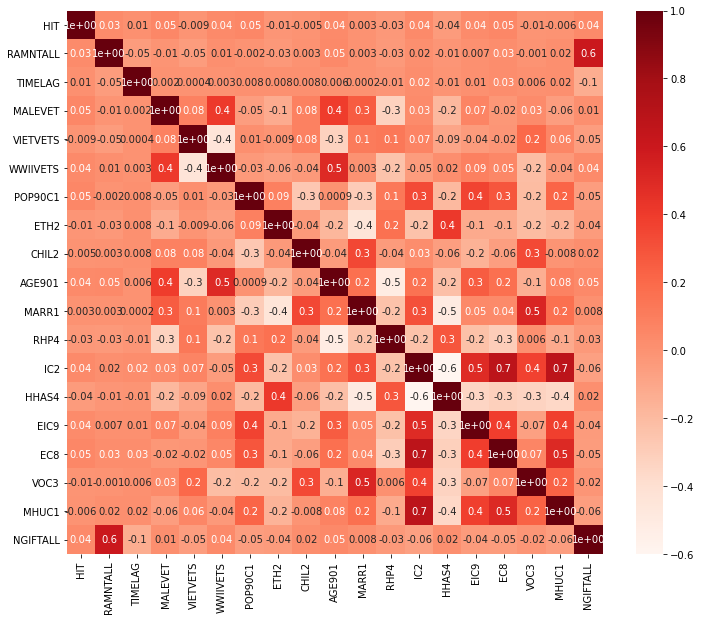

In [85]:
cor_heatmap(df_correlation)

In [86]:
df[Metric_features].shape

(91084, 19)

## Standardize Minimax 

In [87]:
df_minmax = df.copy()

In [88]:
# Use MinMaxScaler to scale the data
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(df_minmax[Metric_features])
scaled_feat

array([[0.        , 0.02396537, 0.00367647, ..., 0.19191919, 0.28571429,
        0.20547945],
       [0.00829876, 0.01013514, 0.00827206, ..., 0.27272727, 0.76190476,
        0.10273973],
       [0.24896266, 0.02544341, 0.01286765, ..., 0.18181818, 0.28571429,
        0.24657534],
       ...,
       [0.        , 0.0123522 , 0.00919118, ..., 0.09090909, 0.38095238,
        0.0890411 ],
       [0.        , 0.00274493, 0.00183824, ..., 0.35353535, 0.23809524,
        0.02054795],
       [0.        , 0.00126689, 0.00873162, ..., 0.19191919, 0.76190476,
        0.        ]])

In [89]:
# See what the fit method is doing (notice the trailing underscore):
#print("Parameters fitted:\n", scaler.data_min_, "\n", scaler.data_max_)

In [90]:
df_minmax[Metric_features] = scaled_feat
# df_minmax[Metric_features].head()

In [91]:
# Checking max and min of minmaxed variables
#df_minmax[Metric_features].describe().round(2)

In [92]:
df = df_minmax

In [93]:
df[Non_metric_features] = df[Non_metric_features].astype(str)

In [94]:
df[Non_metric_features].dtypes.unique()

array([dtype('O')], dtype=object)

## Standardize Standart 

In [95]:
#df_standart = df.copy()

In [96]:
# Use Standard Scaler to scale the data
# scaler = StandardScaler()
# scaled_feat = scaler.fit_transform(df_standart[Metric_features])
# scaled_feat

In [97]:
# df_standart[Metric_features] = scaled_feat
# df = df_standart

## One-hot encoding

In [98]:
ohc_df= df.copy()

In [99]:
ohc_df[Non_metric_features] = ohc_df[Non_metric_features].astype(str)

In [100]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
ohc = OneHotEncoder(sparse=False)
ohc_feat = ohc.fit_transform(ohc_df[Non_metric_features])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=ohc_df.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_df

x0_Army  x0_Couple  x0_Doctor  x0_Elite  x0_Judge  x0_Man  x0_Religion  \
0          0.0        0.0        0.0       0.0       0.0     0.0          0.0   
3          0.0        0.0        0.0       0.0       0.0     0.0          0.0   
4          0.0        0.0        0.0       0.0       0.0     0.0          0.0   
6          0.0        0.0        0.0       0.0       0.0     0.0          0.0   
9          0.0        0.0        0.0       0.0       0.0     1.0          0.0   
...        ...        ...        ...       ...       ...     ...          ...   
95388      0.0        0.0        0.0       0.0       0.0     0.0          0.0   
95392      0.0        0.0        0.0       0.0       0.0     1.0          0.0   
95397      0.0        0.0        0.0       0.0       0.0     0.0          0.0   
95402      0.0        0.0        0.0       0.0       0.0     0.0          0.0   
95407      0.0        0.0        0.0       0.0       0.0     1.0          0.0   

       x0_Undifined  x0_Woman  x1_AK  ...  x62_4  x63_D  x63_E  x63_F  x63_G  \
0               1.0       0.0    0.0  ...    1.0    0.0    1.0    0.0    0.0   
3               1.0       0.0    0.0  ...    1.0    0.0    1.0    0.0    0.0   
4               1.0       0.0    0.0  ...    0.0    0.0    0.0    1.0    0.0   
6               1.0       0.0    0.0  ...    0.0    0.0    1.0    0.0    0.0   
9               0.0       0.0    0.0  ...    0.0    0.0    0.0    1.0    0.0   
...             ...       ...    ...  ...    ...    ...    ...    ...    ...   
95388           1.0       0.0    0.0  ...    0.0    0.0    0.0    1.0    0.0   
95392           0.0       0.0    0.0  ...    0.0    0.0    0.0    0.0    1.0   
95397           0.0       1.0    0.0  ...    0.0    0.0    0.0    0.0    1.0   
95402           1.0       0.0    0.0  ...    0.0    0.0    1.0    0.0    0.0   
95407           0.0       0.0    1.0  ...    0.0    0.0    0.0    0.0    1.0   

       x64_   x64_A  x64_B  x64_C  x64_D  
0        0.0    0.0    0.0    1.0    0.0  
3        0.0    0.0    0.0    1.0    0.0  
4        0.0    1.0    0.0    0.0    0.0  
6        0.0    0.0    0.0    0.0    1.0  
9        0.0    0.0    1.0    0.0    0.0  
...      ...    ...    ...    ...    ...  
95388    0.0    0.0    1.0    0.0    0.0  
95392    0.0    0.0    0.0    0.0    1.0  
95397    0.0    0.0    1.0    0.0    0.0  
95402    0.0    0.0    0.0    0.0    1.0  
95407    0.0    0.0    0.0    1.0    0.0  

[91084 rows x 2264 columns]

In [101]:

df.drop(columns = Non_metric_features,inplace = True)


### join one hot enconding with the original df

In [102]:
#df = pd.concat([df[Metric_features],ohc_df], axis=1)

## Descriptive Statistics before Clustering:

In [103]:
df[Metric_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91084 entries, 0 to 95407
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HIT       91084 non-null  float64
 1   RAMNTALL  91084 non-null  float64
 2   TIMELAG   91084 non-null  float64
 3   MALEVET   91084 non-null  float64
 4   VIETVETS  91084 non-null  float64
 5   WWIIVETS  91084 non-null  float64
 6   POP90C1   91084 non-null  float64
 7   ETH2      91084 non-null  float64
 8   CHIL2     91084 non-null  float64
 9   AGE901    91084 non-null  float64
 10  MARR1     91084 non-null  float64
 11  RHP4      91084 non-null  float64
 12  IC2       91084 non-null  float64
 13  HHAS4     91084 non-null  float64
 14  EIC9      91084 non-null  float64
 15  EC8       91084 non-null  float64
 16  VOC3      91084 non-null  float64
 17  MHUC1     91084 non-null  float64
 18  NGIFTALL  91084 non-null  float64
dtypes: float64(19)
memory usage: 13.9 MB


In [104]:
df[Metric_features].describe()

HIT      RAMNTALL       TIMELAG       MALEVET      VIETVETS  \
count  91084.000000  91084.000000  91084.000000  91084.000000  91084.000000   
mean       0.013837      0.009549      0.007505      0.308805      0.301515   
std        0.037866      0.012033      0.006543      0.113715      0.151353   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.002851      0.003676      0.252525      0.212121   
50%        0.000000      0.006862      0.006434      0.313131      0.292929   
75%        0.012448      0.012458      0.010110      0.373737      0.393939   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           WWIIVETS       POP90C1          ETH2         CHIL2        AGE901  \
count  91084.000000  91084.000000  91084.000000  91084.000000  91084.000000   
mean       0.330713      0.593948      0.076252      0.391794      0.328924   
std        0.176767      0.478710      0.169795      0.050553      0.109689   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.212121      0.000000      0.000000      0.363636      0.260870   
50%        0.323232      1.000000      0.010101      0.393939      0.304348   
75%        0.434343      1.000000      0.060606      0.424242      0.362319   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

              MARR1          RHP4           IC2         HHAS4          EIC9  \
count  91084.000000  91084.000000  91084.000000  91084.000000  91084.000000   
mean       0.592314      0.164150      0.259233      0.109903      0.069401   
std        0.118745      0.040566      0.112412      0.100596      0.046034   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.535354      0.148148      0.183333      0.040404      0.040404   
50%        0.616162      0.148148      0.237333      0.080808      0.060606   
75%        0.676768      0.185185      0.309333      0.151515      0.090909   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                EC8          VOC3         MHUC1      NGIFTALL  
count  91084.000000  91084.000000  91084.000000  91084.000000  
mean       0.074307      0.204423      0.388140      0.058748  
std        0.070724      0.107936      0.163675      0.057995  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.030303      0.131313      0.285714      0.013699  
50%        0.050505      0.191919      0.380952      0.041096  
75%        0.101010      0.272727      0.428571      0.082192  
max        1.000000      1.000000      1.000000      1.000000

### Dimensionality Reduction:


##### PCA:

In [105]:
# df_pca = df.copy()

In [106]:
# df_pca[Metric_features]

In [107]:
# df_pca[Metric_features].var()

In [108]:
# # # Use PCA to reduce dimensionality of data
# pca = PCA()
# pca_feat = pca.fit_transform(df_pca[Metric_features])
# pca_feat  # What is this output?

## how many?

In [109]:
# # Output PCA table
# pca_table = pd.DataFrame(
#      {"Eigenvalue": pca.explained_variance_,
#       "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
#       "Proportion": pca.explained_variance_ratio_,
#       "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
#      index=range(1, pca.n_components_ + 1)
#  )

In [110]:
# df_pca[Metric_features].var().sum()/df_pca[Metric_features].shape[1]

#Treshold do pearson

In [111]:
# pca_table.head(50)

In [112]:
# # # figure and axes
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(60, 5))

# # # draw plots
# ax1.plot(pca.explained_variance_[0:100], marker=".", markersize=12)
# ax2.plot(pca.explained_variance_ratio_[0:100], marker=".", markersize=12, label="Proportion")
# ax2.plot(np.cumsum(pca.explained_variance_ratio_[0:100]), marker=".", markersize=12, linestyle="--", label="Cumulative")

# # # customizations
# ax2.legend()
# ax1.set_title("Scree Plot", fontsize=14)
# ax2.set_title("Variance Explained", fontsize=14)
# ax1.set_ylabel("Eigenvalue")
# ax2.set_ylabel("Proportion")
# ax1.set_xlabel("Components")
# ax2.set_xlabel("Components")
# ax1.set_xticks(range(0, pca.n_components_-97, 2))
# ax1.set_xticklabels(range(1, pca.n_components_ -97+ 1, 2))
# ax2.set_xticks(range(0, pca.n_components_-97, 2))
# ax2.set_xticklabels(range(1, pca.n_components_-97 + 1, 2))

# plt.show()

In [113]:
#  var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [114]:
# fig = plt.figure(figsize=[12,8],dpi=200)
# plt.vlines(x=12, ymax=1, ymin=0, colors="r", linestyles="--")
# plt.hlines(y=0.8, xmax=30, xmin=0, colors="g", linestyles="--")
# plt.plot(var_cumu[0:30])
# plt.ylabel("Cumulative variance explained")
# plt.show()

In [115]:
# # # Perform PCA again with the number of principal components you want to retain
# pca = IncrementalPCA(n_components=12)
# pca_feat = pca.fit_transform(df_pca[Metric_features])
# pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
# pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
# pca_df

In [116]:
# # # Reassigning df to contain pca variables
# df_pca = pd.concat([df_pca, pca_df], axis=1)
# df_pca.head()

In [117]:
# def _color_red_or_green(val):
#     if val < -0.35:
#         color = 'background-color: red'
#     elif val > 0.35:
#         color = 'background-color: green'
#     else:
#         color = ''
#     return color

# # Interpreting each Principal Component
# loadings = df_pca[Metric_features + pca_feat_names].corr().loc[Metric_features, pca_feat_names]
# loadings.style.applymap(_color_red_or_green)

In [118]:
# df = df_pca.copy()

In [119]:
# df.drop(columns = ['PC10'],inplace =True)

In [120]:
#BOM# PC0 -> city,high gdp,good employment,high educated,foreign born,good houses

# PC1 -> single father

#BOM# PC2 -> good response, potential offers
#BOM#PC3 -> black people, young pop,no families, poor houses,low income,below poverty level,no cars,slum,low education,

#PC4 -> holyday place, small houses, exodo,low born in state of residence

#PC5 -> rural/periferical area,single mother,normal houses

#BOM#PC6 -> low veterans from WWII, young pop,low gdp,single mother,young veterans from vietnam

#BOM#PC7 -> veterans from WWII,old people,calm place holyday,medium low income,social security,

#BOM#PC8 -> lot of people per house,own car,employed people, medium education, people born there,normal houses,

#BOM#PC9 -> black people,emigrants,low income per family,

#PC10 -> graduated people

#PC11 -> white people,living alone,small houses,emigrants

In [121]:
# df.rename(columns={"PC0": "PC0_High_Class_City", "PC1": "PC1_single_father","PC2": "PC2_potential_offers", "PC3": "PC3_poverty",
#                    "PC4": "PC4_retired_people", "PC5": "PC5_periferical area",
#                   "PC6": "PC6_Vietnam_veterans", "PC7": "PC7_WWll_Vets","PC8": "PC8_medium_class", "PC9": "PC9_low_inc_emigrants","PC11": "PC11_young_people"}, inplace = True)

In [122]:
# pc_features = df.columns[df.columns.str.startswith('PC')]
# pc_features

In [123]:
# df_pca_features = df[pc_features]
# df_pca_features.drop(columns = ['PCOWNERS'],inplace = True)
# pc_features = df_pca_features.columns[df_pca_features.columns.str.startswith('PC')]

In [124]:
dates_ = df.select_dtypes(include='datetime')

In [125]:
df.drop(columns = dates_,inplace = True)


# SOM

## Perspectives

### Socio-economic perspective:

In [126]:
Socio_economic = ['POP90C1','ETH2','CHIL2','AGE901','MARR1','RHP4','IC2','HHAS4','EIC9','EC8','VOC3','MHUC1']

In [127]:
# This som implementation does not have a random seed parameter
# We're going to set it up ourselves
np.random.seed(42)

# Notice that the SOM did not converge - We're under a time constraint for this class
sm = sompy.SOMFactory().build(
    df[Socio_economic].values, 
    mapsize=(50, 50), 
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=Socio_economic
)
sm.train(n_job=-1, verbose='info', train_rough_len=100, train_finetune_len=100)

 Training...
 random_initialization took: 0.003000 seconds
 Rough training...
 radius_ini: 17.000000 , radius_final: 2.833333, trainlen: 100

 epoch: 1 ---> elapsed time:  2.496000, quantization error: 6.508482

 epoch: 2 ---> elapsed time:  2.568000, quantization error: 3.139060

 epoch: 3 ---> elapsed time:  2.508000, quantization error: 3.115196

 epoch: 4 ---> elapsed time:  2.489000, quantization error: 3.106057

 epoch: 5 ---> elapsed time:  2.588000, quantization error: 3.100425

 epoch: 6 ---> elapsed time:  2.811000, quantization error: 3.096233

 epoch: 7 ---> elapsed time:  2.912000, quantization error: 3.093946

 epoch: 8 ---> elapsed time:  2.526000, quantization error: 3.092540

 epoch: 9 ---> elapsed time:  2.678000, quantization error: 3.091288

 epoch: 10 ---> elapsed time:  2.847000, quantization error: 3.090082

 epoch: 11 ---> elapsed time:  2.592000, quantization error: 3.088871

 epoch: 12 ---> elapsed time:  3.084000, quantization error: 3.087638

 epoch: 13 --->

 epoch: 14 ---> elapsed time:  2.888000, quantization error: 2.421148

 epoch: 15 ---> elapsed time:  2.701000, quantization error: 2.414255

 epoch: 16 ---> elapsed time:  2.634000, quantization error: 2.407294

 epoch: 17 ---> elapsed time:  2.829000, quantization error: 2.400248

 epoch: 18 ---> elapsed time:  2.638000, quantization error: 2.393143

 epoch: 19 ---> elapsed time:  2.560000, quantization error: 2.385983

 epoch: 20 ---> elapsed time:  2.462000, quantization error: 2.378735

 epoch: 21 ---> elapsed time:  2.488000, quantization error: 2.371407

 epoch: 22 ---> elapsed time:  2.580000, quantization error: 2.363996

 epoch: 23 ---> elapsed time:  2.822000, quantization error: 2.356478

 epoch: 24 ---> elapsed time:  2.614000, quantization error: 2.348800

 epoch: 25 ---> elapsed time:  2.582000, quantization error: 2.341024

 epoch: 26 ---> elapsed time:  2.591000, quantization error: 2.333058

 epoch: 27 ---> elapsed time:  2.541000, quantization error: 2.324921

 epoch

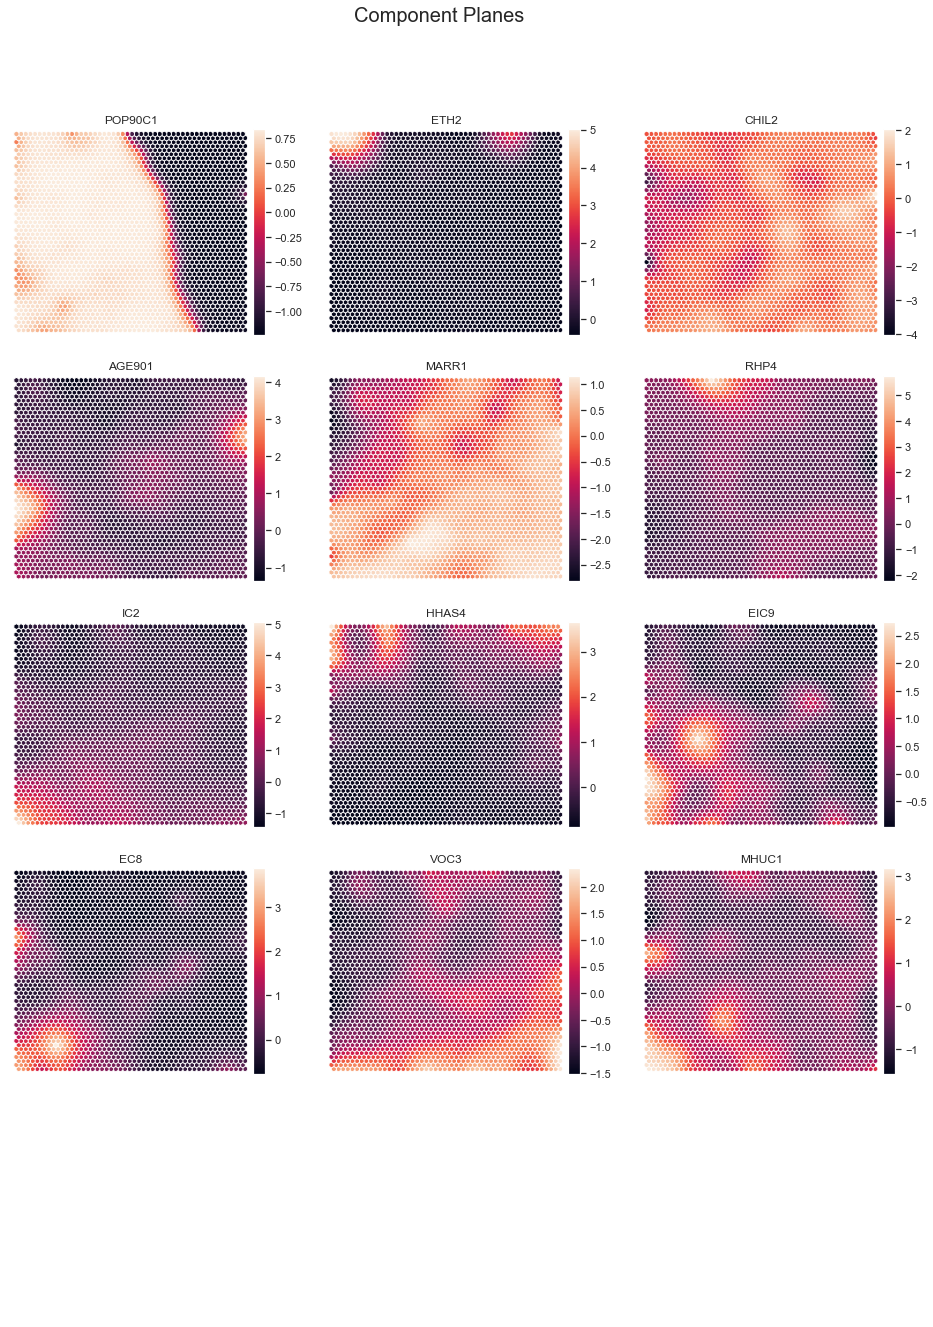

In [128]:
# Visualizing the Component planes (feature values)
sns.set()
view2D = View2D(12,12,"", text_size=10)
view2D.show(sm, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes", fontsize=20)
plt.show()

In [1]:
# Here you have U-matrix
u = sompy.umatrix.UMatrixView(12, 12, 'umatrix', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    sm, 
    distance2=1, 
    row_normalized=False, 
    show_data=True, 
    contooor=True, # Visualize isomorphic curves
    blob=False
)

UMAT[1]  # U-matrix values - no colorscale so we have to rely on the values :(

NameError: name 'sompy' is not defined

In [130]:
# vhts  = BmuHitsView(12,12,"Hits Map")
# vhts.show(sm, anotate=True, onlyzeros=False, labelsize=12, cmap="Blues")
# plt.show()

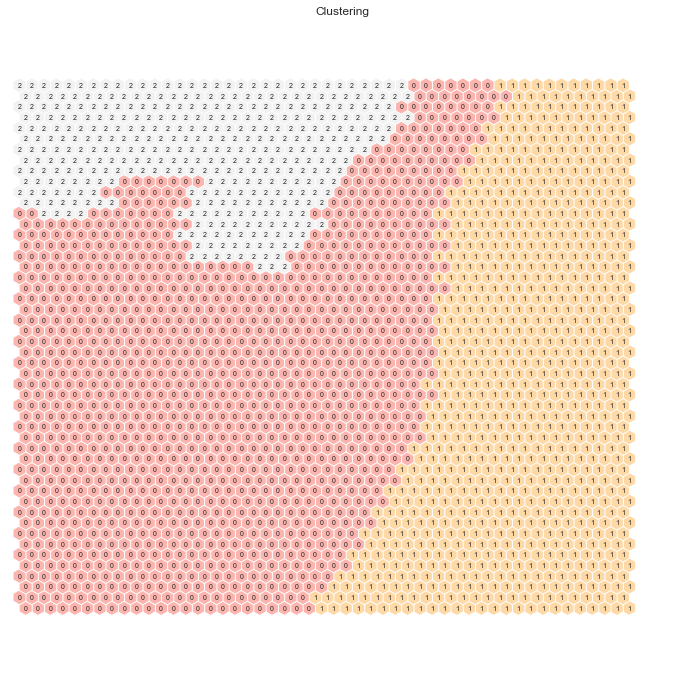

In [134]:
# Perform Hierarchical clustering on top of the 2500 untis (sm.get_node_vectors() output)
hierclust = AgglomerativeClustering(n_clusters=3, linkage='ward')
nodeclus_labels = sm.cluster(hierclust)

hits  = HitMapView(12, 12,"Clustering",text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

### Final Cluster

In [135]:
# Check the nodes and and respective clusters
nodes = sm.get_node_vectors()

df_nodes = pd.DataFrame(nodes, columns=Socio_economic)
df_nodes['label'] = nodeclus_labels
df_nodes

POP90C1      ETH2     CHIL2    AGE901     MARR1      RHP4       IC2  \
0     0.009530  0.044351  0.380965  0.265803  0.498861  0.175954  0.122044   
1     0.014824  0.036542  0.391423  0.270604  0.537841  0.177727  0.124139   
2     0.024320  0.031123  0.404061  0.271994  0.577004  0.181704  0.122991   
3     0.032469  0.038308  0.411535  0.279437  0.595315  0.180555  0.127433   
4     0.020725  0.082612  0.411130  0.284414  0.591100  0.178506  0.132979   
...        ...       ...       ...       ...       ...       ...       ...   
2495  0.855190  0.015507  0.417048  0.368040  0.700371  0.139429  0.570978   
2496  0.890631  0.014940  0.415508  0.386498  0.696073  0.136602  0.622560   
2497  0.925373  0.013814  0.413673  0.402159  0.688539  0.132757  0.684705   
2498  0.950600  0.013303  0.410691  0.418056  0.685960  0.126372  0.752724   
2499  0.962954  0.012193  0.407254  0.430926  0.681010  0.121539  0.828378   

         HHAS4      EIC9       EC8      VOC3     MHUC1  label  
0     0.366552  0.032555  0.030870  0.110405  0.236314      1  
1     0.353496  0.030759  0.029060  0.128790  0.251250      1  
2     0.358801  0.028893  0.028211  0.148914  0.272674      1  
3     0.340441  0.029511  0.029920  0.164785  0.304987      1  
4     0.322017  0.031215  0.030612  0.163631  0.317025      1  
...        ...       ...       ...       ...       ...    ...  
2495  0.025568  0.130261  0.195055  0.377292  0.845108      2  
2496  0.025549  0.135390  0.220868  0.380589  0.868761      2  
2497  0.025616  0.135754  0.250297  0.380159  0.883331      2  
2498  0.027446  0.145855  0.275424  0.376535  0.891891      2  
2499  0.029609  0.164231  0.289032  0.367708  0.908952      2  

[2500 rows x 13 columns]

In [136]:
# Obtaining SOM's BMUs labels
bmus_map = sm.find_bmu(df[Socio_economic])[0]  # get bmus for each observation in df

df_bmus = pd.DataFrame(
    np.concatenate((df[Socio_economic], np.expand_dims(bmus_map,1)), axis=1),
    index=df[Socio_economic].index, columns=np.append(df[Socio_economic].columns,"BMU")
)
df_bmus

POP90C1      ETH2     CHIL2    AGE901     MARR1      RHP4       IC2  \
0          0.0  0.010101  0.424242  0.391304  0.616162  0.148148  0.212000   
3          0.0  0.000000  0.353535  0.289855  0.636364  0.185185  0.258667   
4          1.0  0.989899  0.434343  0.304348  0.424242  0.222222  0.166667   
6          0.0  0.000000  0.414141  0.333333  0.555556  0.185185  0.189333   
9          0.0  0.262626  0.424242  0.217391  0.535354  0.185185  0.219333   
...        ...       ...       ...       ...       ...       ...       ...   
95388      1.0  0.020202  0.373737  0.362319  0.575758  0.148148  0.184000   
95392      0.0  0.000000  0.404040  0.318841  0.676768  0.111111  0.154667   
95397      1.0  0.010101  0.353535  0.217391  0.444444  0.148148  0.205333   
95402      0.0  0.020202  0.414141  0.318841  0.666667  0.148148  0.184000   
95407      1.0  0.101010  0.373737  0.231884  0.585859  0.148148  0.320667   

          HHAS4      EIC9       EC8      VOC3     MHUC1     BMU  
0      0.010101  0.060606  0.030303  0.191919  0.285714  1466.0  
3      0.202020  0.030303  0.050505  0.272727  0.761905  1466.0  
4      0.141414  0.020202  0.050505  0.181818  0.285714  1771.0  
6      0.030303  0.050505  0.030303  0.171717  0.238095  1466.0  
9      0.070707  0.060606  0.010101  0.272727  0.285714  1566.0  
...         ...       ...       ...       ...       ...     ...  
95388  0.090909  0.080808  0.040404  0.131313  0.238095  1771.0  
95392  0.101010  0.020202  0.020202  0.353535  0.333333  1466.0  
95397  0.171717  0.090909  0.040404  0.090909  0.380952  1772.0  
95402  0.141414  0.050505  0.080808  0.353535  0.238095  1466.0  
95407  0.060606  0.070707  0.080808  0.191919  0.761905  1772.0  

[91084 rows x 13 columns]

In [137]:
# Get cluster labels for each observation
df_final = df_bmus.merge(df_nodes['label'], 'left', left_on="BMU", right_index=True)
df_final

POP90C1      ETH2     CHIL2    AGE901     MARR1      RHP4       IC2  \
0          0.0  0.010101  0.424242  0.391304  0.616162  0.148148  0.212000   
3          0.0  0.000000  0.353535  0.289855  0.636364  0.185185  0.258667   
4          1.0  0.989899  0.434343  0.304348  0.424242  0.222222  0.166667   
6          0.0  0.000000  0.414141  0.333333  0.555556  0.185185  0.189333   
9          0.0  0.262626  0.424242  0.217391  0.535354  0.185185  0.219333   
...        ...       ...       ...       ...       ...       ...       ...   
95388      1.0  0.020202  0.373737  0.362319  0.575758  0.148148  0.184000   
95392      0.0  0.000000  0.404040  0.318841  0.676768  0.111111  0.154667   
95397      1.0  0.010101  0.353535  0.217391  0.444444  0.148148  0.205333   
95402      0.0  0.020202  0.414141  0.318841  0.666667  0.148148  0.184000   
95407      1.0  0.101010  0.373737  0.231884  0.585859  0.148148  0.320667   

          HHAS4      EIC9       EC8      VOC3     MHUC1     BMU  label  
0      0.010101  0.060606  0.030303  0.191919  0.285714  1466.0      0  
3      0.202020  0.030303  0.050505  0.272727  0.761905  1466.0      0  
4      0.141414  0.020202  0.050505  0.181818  0.285714  1771.0      0  
6      0.030303  0.050505  0.030303  0.171717  0.238095  1466.0      0  
9      0.070707  0.060606  0.010101  0.272727  0.285714  1566.0      0  
...         ...       ...       ...       ...       ...     ...    ...  
95388  0.090909  0.080808  0.040404  0.131313  0.238095  1771.0      0  
95392  0.101010  0.020202  0.020202  0.353535  0.333333  1466.0      0  
95397  0.171717  0.090909  0.040404  0.090909  0.380952  1772.0      0  
95402  0.141414  0.050505  0.080808  0.353535  0.238095  1466.0      0  
95407  0.060606  0.070707  0.080808  0.191919  0.761905  1772.0      0  

[91084 rows x 14 columns]

In [138]:
df_final['label'].unique()

array([0, 2, 1], dtype=int64)

In [139]:
# Characterizing the final clusters
# Characterizing the final clusters
df_final.drop(columns='BMU').groupby('label').mean()

POP90C1      ETH2     CHIL2    AGE901     MARR1      RHP4       IC2  \
label                                                                         
0      0.579990  0.078228  0.391689  0.327674  0.590603  0.164485  0.248148   
1      0.000000  0.050505  0.362412  0.140975  0.556780  0.309764  0.199455   
2      0.977418  0.023058  0.394950  0.364649  0.638943  0.153612  0.559596   

          HHAS4      EIC9       EC8      VOC3     MHUC1  
label                                                    
0      0.112550  0.067283  0.069957  0.199898  0.371539  
1      0.187022  0.027242  0.042853  0.046526  0.303030  
2      0.037539  0.127085  0.192264  0.328396  0.837931

In [140]:
Socio_economic_persp = df_final.drop(columns='BMU').groupby('label').mean()

In [141]:
def _color_red_or_green(val):
    if val <= 0.4:
        color = 'background-color: mistyrose'
    elif val > 0.4 and val <= 0.65:
        color = 'background-color: darksalmon'
    else:
        color = 'background-color: tomato'  

    return color

In [142]:
Socio_economic_persp.style.applymap(_color_red_or_green)

In [ ]:
# POP90C1 -> Percent Population in Urbanized Area
# ETH2 -> Percent Black
# CHIL2 -> Percent Children Age 7 - 13
# AGE901 -> Median Age of Population
# MARR1 -> Percent Married
# RHP4 -> Average Number of Persons per Room
# IC5 -> Per Capita Income
# HHAS4 -> Percent Persons Below Poverty Level
# EC8 -> Percent Adults 25+ Graduate Degree
# voc3 -> Percent Households w/ 3+ Vehicles
# HC20 -> Percent Housing Units w/ Complete Plumbiing Facilities

### Clusters naming & interpretation


#### Join som dataset with ohc:


In [143]:
cluster_final = pd.concat([df_final,ohc_df],axis=1)

In [ ]:
cluster_final.label.unique()

In [ ]:
cluster_final.isna().sum().sort_values()

In [ ]:
cluster_final.groupby('label').mean()['x12_1.0'] # cluster 2 incomes baixos

In [ ]:
cluster_final.groupby('label').mean()['x12_3.0'] # cluster 0 incomes medios

In [ ]:
cluster_final.groupby('label').mean()['x12_6.0'] # cluster 1 incomes altos

In [ ]:
cluster_final.groupby('label').mean()['x16_1'] # cluster 1 has + majors, cluster 2 has 0

#### PVA Interest perspective:

In [144]:
PVA_Interest =['HIT','RAMNTALL','TIMELAG','MALEVET','VIETVETS','WWIIVETS','NGIFTALL']

In [145]:
# This som implementation does not have a random seed parameter
# We're going to set it up ourselves
np.random.seed(42)

# Notice that the SOM did not converge - We're under a time constraint for this class
sm_ = sompy.SOMFactory().build(
    df[PVA_Interest].values, 
    mapsize=(50, 50), 
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=PVA_Interest
)
sm_.train(n_job=-1, verbose='info', train_rough_len=100, train_finetune_len=100)

 Training...
 random_initialization took: 0.002000 seconds
 Rough training...
 radius_ini: 17.000000 , radius_final: 2.833333, trainlen: 100

 epoch: 1 ---> elapsed time:  2.795000, quantization error: 5.300643

 epoch: 2 ---> elapsed time:  2.752000, quantization error: 2.224606

 epoch: 3 ---> elapsed time:  3.387000, quantization error: 2.213228

 epoch: 4 ---> elapsed time:  2.606000, quantization error: 2.207290

 epoch: 5 ---> elapsed time:  2.710000, quantization error: 2.199950

 epoch: 6 ---> elapsed time:  2.531000, quantization error: 2.192610

 epoch: 7 ---> elapsed time:  2.690000, quantization error: 2.187536

 epoch: 8 ---> elapsed time:  3.592000, quantization error: 2.184101

 epoch: 9 ---> elapsed time:  3.320000, quantization error: 2.182053

 epoch: 10 ---> elapsed time:  3.338000, quantization error: 2.180663

 epoch: 11 ---> elapsed time:  3.185000, quantization error: 2.179410

 epoch: 12 ---> elapsed time:  3.012000, quantization error: 2.178172

 epoch: 13 --->

 epoch: 14 ---> elapsed time:  3.026000, quantization error: 1.688403

 epoch: 15 ---> elapsed time:  2.725000, quantization error: 1.682947

 epoch: 16 ---> elapsed time:  2.733000, quantization error: 1.677423

 epoch: 17 ---> elapsed time:  2.628000, quantization error: 1.671883

 epoch: 18 ---> elapsed time:  2.631000, quantization error: 1.666313

 epoch: 19 ---> elapsed time:  3.431000, quantization error: 1.660682

 epoch: 20 ---> elapsed time:  3.136000, quantization error: 1.655023

 epoch: 21 ---> elapsed time:  3.026000, quantization error: 1.649264

 epoch: 22 ---> elapsed time:  3.136000, quantization error: 1.643414

 epoch: 23 ---> elapsed time:  2.680000, quantization error: 1.637478

 epoch: 24 ---> elapsed time:  2.613000, quantization error: 1.631423

 epoch: 25 ---> elapsed time:  2.786000, quantization error: 1.625314

 epoch: 26 ---> elapsed time:  2.604000, quantization error: 1.619168

 epoch: 27 ---> elapsed time:  2.541000, quantization error: 1.612988

 epoch

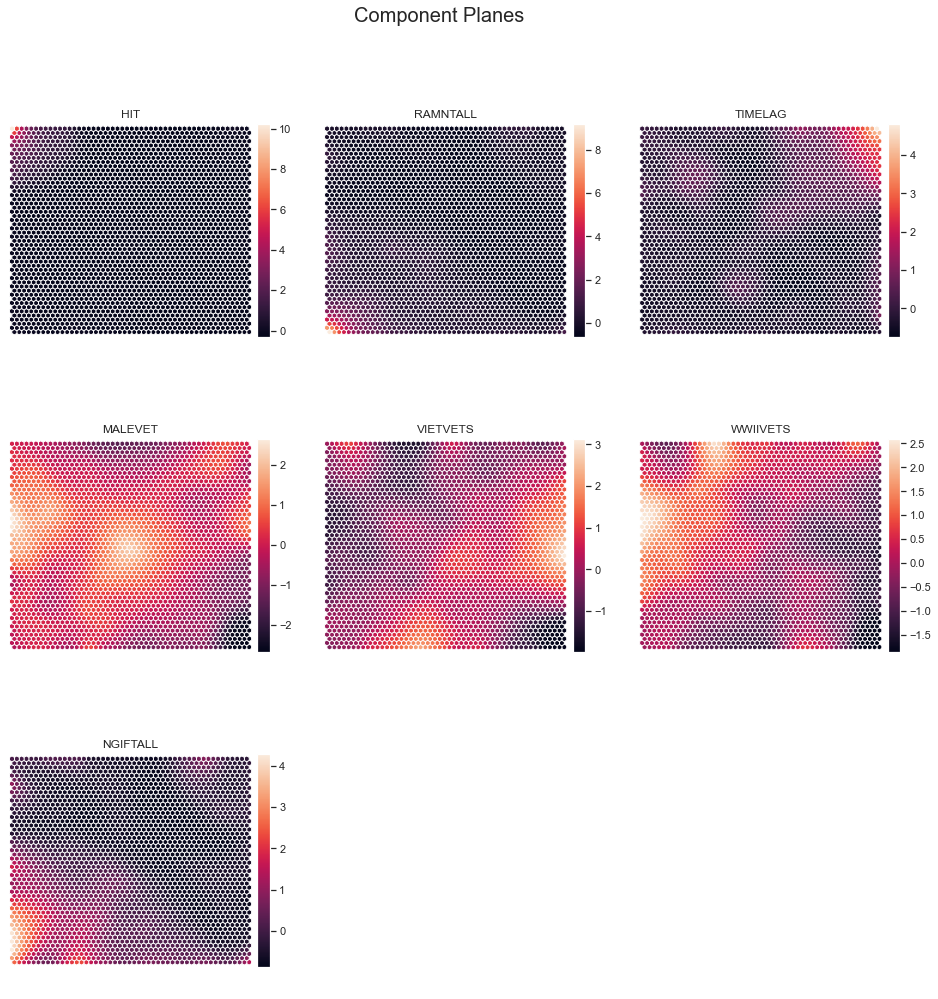

In [146]:
# Component planes on the 50x50 grid
sns.set()
view2D = View2D(12,12,"", text_size=10)
view2D.show(sm_, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes", fontsize=20)
plt.show()

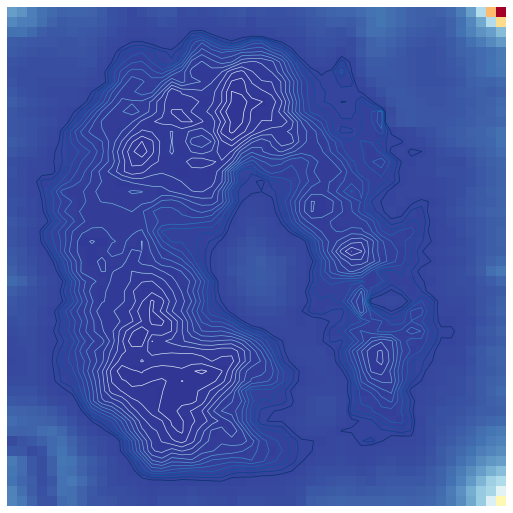

In [147]:
# U-matrix of the 50x50 grid
u = sompy.umatrix.UMatrixView(12, 12, 'umatrix', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    sm_, 
    distance2=1, 
    row_normalized=False, 
    show_data=False, 
    contooor=True # Visualize isomorphic curves
)

In [148]:
# vhts  = BmuHitsView(12,12,"Hits Map")
# vhts.show(sm, anotate=True, onlyzeros=False, labelsize=12, cmap="Blues")
# plt.show()

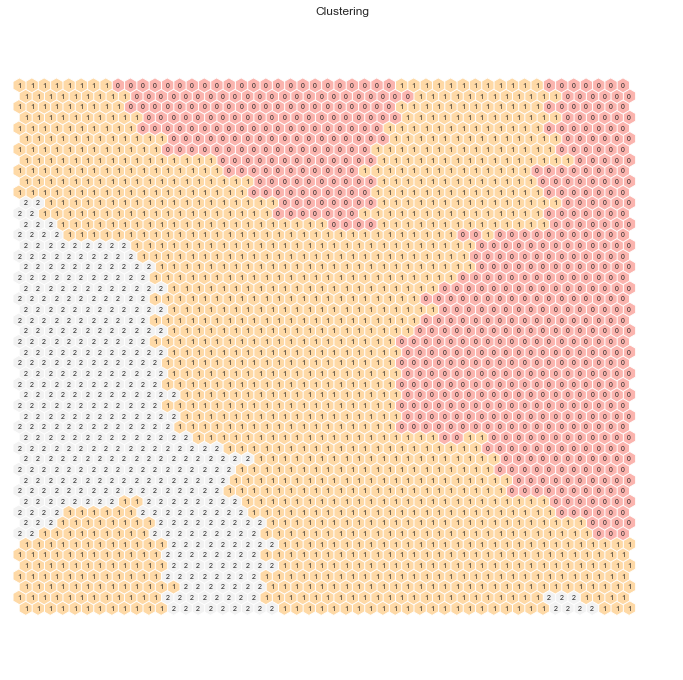

In [149]:
# Perform Hierarchical clustering on top of the 2500 untis (sm.get_node_vectors() output)
hierclust_ = AgglomerativeClustering(n_clusters=3, linkage='ward')
nodeclus_labels_ = sm_.cluster(hierclust_)

hits  = HitMapView(12, 12,"Clustering",text_size=10)
hits.show(sm_, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

#plt.show()

In [ ]:
len(nodeclus_labels)

### Final Cluster

In [150]:
# Check the nodes and and respective clusters
nodes_ = sm_.get_node_vectors()

df_nodes_ = pd.DataFrame(nodes_, columns=PVA_Interest)
df_nodes_['label'] = nodeclus_labels
df_nodes_

HIT  RAMNTALL   TIMELAG   MALEVET  VIETVETS  WWIIVETS  NGIFTALL  \
0     0.014333  0.008555  0.038965  0.319047  0.283214  0.356201  0.042003   
1     0.017008  0.008241  0.033378  0.337774  0.251295  0.410017  0.040281   
2     0.018363  0.008044  0.029081  0.354224  0.223446  0.456084  0.040201   
3     0.020328  0.007910  0.025588  0.362606  0.202421  0.498094  0.040651   
4     0.014789  0.008569  0.023576  0.388754  0.186850  0.530947  0.045420   
...        ...       ...       ...       ...       ...       ...       ...   
2495  0.013628  0.053463  0.006747  0.329697  0.292325  0.357885  0.115984   
2496  0.013749  0.062716  0.006718  0.314981  0.293301  0.349597  0.133157   
2497  0.013713  0.075242  0.006431  0.298145  0.277838  0.331020  0.155252   
2498  0.015291  0.093467  0.006090  0.285720  0.261042  0.325503  0.182045   
2499  0.016781  0.120304  0.005788  0.268281  0.249291  0.306908  0.209493   

      label  
0         1  
1         1  
2         1  
3         1  
4         1  
...     ...  
2495      2  
2496      2  
2497      2  
2498      2  
2499      2  

[2500 rows x 8 columns]

In [151]:
df_nodes_.label.unique()

array([1, 0, 2], dtype=int64)

In [152]:
# Obtaining SOM's BMUs labels
bmus_map_ = sm_.find_bmu(df[PVA_Interest])[0]  # get bmus for each observation in df

df_bmus_ = pd.DataFrame(
    np.concatenate((df[PVA_Interest], np.expand_dims(bmus_map_,1)), axis=1),
    index=df[PVA_Interest].index, columns=np.append(df[PVA_Interest].columns,"BMU")
)
df_bmus_

HIT  RAMNTALL   TIMELAG   MALEVET  VIETVETS  WWIIVETS  NGIFTALL  \
0      0.000000  0.023965  0.003676  0.393939  0.343434  0.181818  0.205479   
3      0.008299  0.010135  0.008272  0.232323  0.141414  0.313131  0.102740   
4      0.248963  0.025443  0.012868  0.282828  0.090909  0.535354  0.246575   
6      0.000000  0.009924  0.003676  0.333333  0.363636  0.343434  0.089041   
9      0.000000  0.001584  0.006434  0.282828  0.515152  0.141414  0.013699   
...         ...       ...       ...       ...       ...       ...       ...   
95388  0.008299  0.011613  0.003676  0.303030  0.434343  0.484848  0.095890   
95392  0.000000  0.001267  0.008732  0.363636  0.242424  0.353535  0.000000   
95397  0.000000  0.012352  0.009191  0.323232  0.343434  0.363636  0.089041   
95402  0.000000  0.002745  0.001838  0.202020  0.212121  0.636364  0.020548   
95407  0.000000  0.001267  0.008732  0.363636  0.474747  0.111111  0.000000   

          BMU  
0      1776.0  
3      1234.0  
4      1185.0  
6      1776.0  
9      1825.0  
...       ...  
95388  1134.0  
95392  1184.0  
95397  1776.0  
95402  1135.0  
95407  1776.0  

[91084 rows x 8 columns]

In [153]:
# Get cluster labels for each observation
df_final_ = df_bmus_.merge(df_nodes_['label'], 'left', left_on="BMU", right_index=True)

In [154]:
# Characterizing the final clusters
df_final_.drop(columns='BMU').groupby('label').mean()

HIT  RAMNTALL   TIMELAG   MALEVET  VIETVETS  WWIIVETS  NGIFTALL
label                                                                      
0      0.015156  0.009609  0.007481  0.312989  0.197776  0.451240  0.058293
1      0.009295  0.009837  0.070974  0.180606  0.029495  0.229091  0.042740
2      0.012717  0.009498  0.007494  0.305310  0.389915  0.228222  0.059145

In [155]:
PVA_Interest_persp=df_final_.drop(columns='BMU').groupby('label').mean()


In [156]:
def _color_red_or_green(val):
    if val <= 0.02:
        color = 'background-color: aliceblue'
    elif val > 0.02 and val <= 0.35:
        color = 'background-color: turquoise'
    elif val > 0.35 and val <= 0.6:
        color = 'background-color: darkturquoise'
    else:
        color = 'background-color: darkcyan'  

    return color

In [157]:
PVA_Interest_persp.style.applymap(_color_red_or_green)

In [ ]:
# HIT ->Indicates total number of known times the donor has responded to a mail order offer other than PVA's.
# RAMNTALL -> Dollar amount of lifetime gifts to date
# TIMELAG -> Number of months between first and second gift
# MALEVET -> % Males Veterans
# VIETVETS ->  % Vietnam Vets
# WWIIVETS ->  % WWII Vets
# NGIFTALL -> Number of lifetime gifts to date

### Clusters naming & interpretation


#### Join som dataset with ohc:


In [158]:
cluster_final_ = pd.concat([df_final_,ohc_df],axis=1)

In [ ]:
cluster_final_.label.unique()

In [ ]:
cluster_final_.isna().sum().sort_values()

In [ ]:
cluster_final_.groupby('label').mean()['x12_1.0'] # cluster 2 incomes baixos

In [ ]:
cluster_final_.groupby('label').mean()['x12_3.0'] # cluster 0 incomes medios

In [ ]:
cluster_final_.groupby('label').mean()['x12_6.0'] # cluster 1 incomes altos

In [ ]:
cluster_final_.groupby('label').mean()['x16_1'] # cluster 1 has + majors, cluster 2 has 0

In [ ]:
cluster_final_.groupby('label').mean()['x19_1'] # cluster 0 has + veterans, all have some veterans

# FINALLLLL

In [161]:
cluster_final = cluster_final['label'] #view 1 

In [162]:
cluster_final_ = cluster_final_['label'] # view 2

In [163]:
cluster_final['PVA_interest_label'] = cluster_final_

In [172]:
cluster_final

0                                                                     0
3                                                                     0
4                                                                     0
6                                                                     0
9                                                                     0
                                            ...                        
95392                                                                 0
95397                                                                 0
95402                                                                 0
95407                                                                 0
PVA_interest_label    0        2
3        0
4        0
6        2
9 ...
Name: label, Length: 91085, dtype: object

In [169]:
df

HIT   MALEVET  VIETVETS  WWIIVETS  LOCALGOV  STATEGOV  FEDGOV  \
0      0.000000  0.393939  0.343434  0.181818        10         2       1   
3      0.008299  0.232323  0.141414  0.313131         3         0       3   
4      0.248963  0.282828  0.090909  0.535354        26         3       2   
6      0.000000  0.333333  0.363636  0.343434         7         1       1   
9      0.000000  0.282828  0.515152  0.141414         5         2       2   
...         ...       ...       ...       ...       ...       ...     ...   
95388  0.008299  0.303030  0.434343  0.484848         7         3       1   
95392  0.000000  0.363636  0.242424  0.353535         9         3       3   
95397  0.000000  0.323232  0.343434  0.363636        25         9       7   
95402  0.000000  0.202020  0.212121  0.636364         7         8       7   
95407  0.000000  0.363636  0.474747  0.111111         7         8      13   

       POP901  POP90C1  POP90C2  ...  CARDPM12  NUMPRM12  RAMNTALL  NGIFTALL  \
0         992      0.0       35  ...         6        14  0.023965  0.205479   
3         640      0.0        8  ...         6        14  0.010135  0.102740   
4        2520      1.0        0  ...        10        25  0.025443  0.246575   
6        1067      0.0       99  ...         4         9  0.009924  0.089041   
9        2607      0.0       90  ...         4         9  0.001584  0.013699   
...       ...      ...      ...  ...       ...       ...       ...       ...   
95388    1502      1.0        0  ...         6        13  0.011613  0.095890   
95392    1605      0.0        0  ...         4        10  0.001267  0.000000   
95397    2120      1.0        0  ...         6        15  0.012352  0.089041   
95402     938      0.0       84  ...         6        14  0.002745  0.020548   
95407   27380      1.0        0  ...         5        12  0.001267  0.000000   

        TIMELAG    AVGGIFT   AGE  OFFERS  socio_economic_label  \
0      0.003676   7.741935  63.0       0                     0   
3      0.008272   6.812500  73.0       1                     0   
4      0.012868   6.864865  81.0       3                     0   
6      0.003676   7.642857  41.0       0                     0   
9      0.006434   9.333333  68.0       0                     0   
...         ...        ...   ...     ...                   ...   
95388  0.003676   8.200000  81.0       0                     0   
95392  0.008732  25.000000  53.0       0                     0   
95397  0.009191   9.285714  81.0       0                     0   
95402  0.001838   9.750000  49.0       0                     0   
95407  0.008732  25.000000  53.0       0                     0   

       PVA_interest_label  
0                       2  
3                       0  
4                       0  
6                       2  
9                       2  
...                   ...  
95388                   0  
95392                   0  
95397                   2  
95402                   0  
95407                   2  

[91084 rows x 148 columns]

In [168]:
df['socio_economic_label'] = cluster_final
df['PVA_interest_label'] = cluster_final_

In [174]:
label_list = ['socio_economic_label','PVA_interest_label']

In [175]:
df.groupby(by=label_list).size().reset_index(name='counts')

socio_economic_label  PVA_interest_label  counts
0                     0                   0   40342
1                     0                   1      23
2                     0                   2   47439
3                     1                   0       3
4                     1                   2      30
5                     2                   0    1514
6                     2                   1       2
7                     2                   2    1731

## Visualizing the data 

In [ ]:
# EIC_group = [ 'EIC1','EIC2','EIC3','EIC4','EIC5','EIC6','EIC7','EIC8','EIC9','EIC10','EIC11','EIC12','EIC13','EIC14',
# 'EIC15','EIC16']

In [ ]:
# sns.set()

# fig, axes = plt.subplots(2, ceil(len(EIC_group) / 2), figsize=(20, 11))


# for ax, feat in zip(axes.flatten(), EIC_group): 
#    sns.boxplot(df[feat], ax=ax)
# title = "Numeric Variables' Box Plots"

# plt.suptitle(title)

# plt.show()